# KNN Regression

In [29]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
# Read the data from the file "Advertising.csv"

filename = "/Users/karnikabhardwaj/Downloads/Advertising.csv"
df = pd.read_csv(filename)

In [4]:
#Take a quick look at the data

df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


# PART 1: KNN by hand for k = 1

In [5]:
# Get a subset of the data i.e., rows 5 to 15
# use the TV column as the predictor
x_true = df.TV.iloc[5:15]

# use the Sales column as the response
y_true = df.Sales.iloc[5:15]

# Sort the data to get indices ordered from the lowest to highest on TV column 
idx = np.argsort(x_true).values

# Get the predictor data in the order given by the idx above
x_true = x_true.iloc[idx].values

# Get the response data in the order given by idx above
y_true = y_true.iloc[idx].values

In [6]:
# find_nearest function to get the index of the nearest neighbor

def find_nearest(array, value):
    idx = pd.Series(np.abs(array-value)).idxmin()
    return idx, array[idx]

In [8]:
# Create some synthetic x-values 
x = np.linspace(np.min(x_true), np.max(x_true))

# Intialize the y-values for the length of the synthetic x-values to zero
y = np.zeros((len(x)))

In [9]:
# Apply the kNN algorithm to predict the y-value for the given x value

for i, xi in enumerate(x):
    
    # get the sales values closest to the given x value
    y[i] = y_true[find_nearest(x_true, xi)[0]]

# Plotting the data

Text(0, 0.5, 'Sales in $1000')

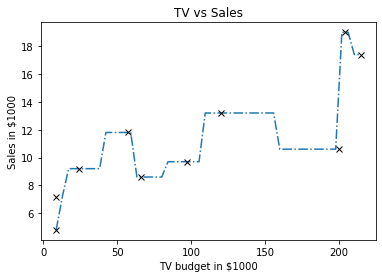

In [11]:
# plot the synthetic data along with the predictions
plt.plot(x,y,'-.')

# plot the original data using black x's
plt.plot(x_true, y_true, 'kx')

#set the title and axis labels
plt.title('TV vs Sales')
plt.xlabel('TV budget in $1000')
plt.ylabel('Sales in $1000')

# KNN for k>1 using sklearn

In [12]:
# Read the data from the file "Advertising.csv"


filename1 = "/Users/karnikabhardwaj/Downloads/Advertising.csv"
df = pd.read_csv(filename1)

# set 'TV' as the predicto variable
x = df[['TV']]

#set 'Sales' as the response vairable 
y = df['Sales']

In [14]:
# Split the dataset into training and testing data with 60% training data with random state 42.
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.6, random_state = 42)

In [26]:
#choose the minimum and maximum value of k 
k_value_min = 1

k_value_max = 70

# create a list of integer k values between k_values_min and k_values_max
k_list = np.linspace(k_value_min, k_value_max, 70, dtype=int)

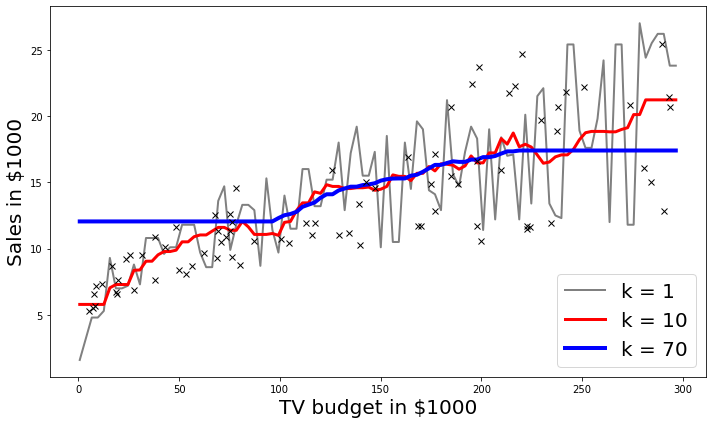

In [18]:
#set the grid to plot the values

fig, ax = plt.subplots(figsize=(10,6))

#variable for altering the linewidth of each plot
j=0

#look over all the k values
for k_value in k_list:
    
    # create a KNN Regression model
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    
    #fitting the model on the training data
    model.fit(x_train, y_train)
    
    # use the trained model to predict on the test data
    y_pred = model.predict(x_test)
    
    #helper code to plot the data along with the model predictions
    colors = ['grey', 'r', 'b']
    if k_value in [1,10,70]:
        xvals = np.linspace(x.min(), x.max(), 100)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds, '-', label = f'k = {int(k_value)}',linewidth=j+2,color = colors[j])
        j+=1
ax.legend(loc='lower right',fontsize=20)
ax.plot(x_test.values, y_test.values, 'x',label='train',color='k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()

In [19]:
# k = 10 would be the better one amomg the two since, k = 70 is underfitting and k = 1 is overfitting.

Finding the best k in kNN regression

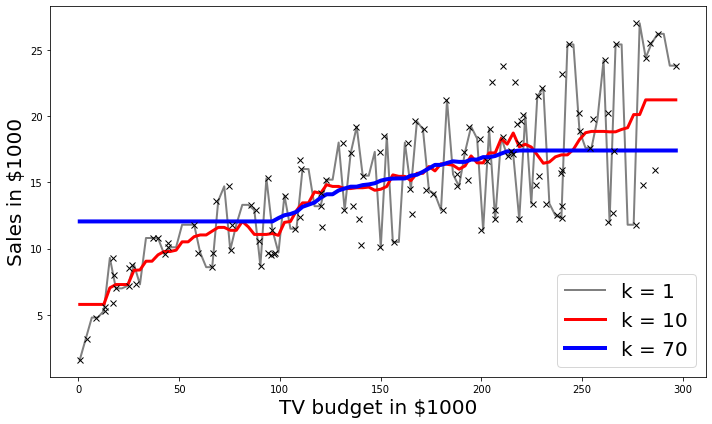

In [21]:
# Mean squared error statement 
# Setup a grid for plotting the data and predictions
fig, ax = plt.subplots(figsize=(10,6))

# Create a dictionary to store the k value against MSE fit {k: MSE@k} 
knn_dict = {}

# Variable used for altering the linewidth of values kNN models
j=0

# Loop over all k values
for k_value in k_list:   
    
    # Create a KNN Regression model for the current k
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    
    # Fit the model on the train data
    model.fit(x_train,y_train)
    
    # Use the trained model to predict on the test data
    y_pred = model.predict(x_test)
    
    # Calculate the MSE of the test data predictions
    MSE = mean_squared_error(y_test, y_pred)
    
    # Store the MSE values of each k value in the dictionary
    knn_dict[k_value] = MSE
    
    
    # Helper code to plot the data and various kNN model predictions
    colors = ['grey','r','b']
    if k_value in [1,10,70]:
        xvals = np.linspace(x.min(),x.max(),100)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds,'-',label = f'k = {int(k_value)}',linewidth=j+2,color = colors[j])
        j+=1
        
ax.legend(loc='lower right',fontsize=20)
ax.plot(x_train.values, y_train.values,'x',label='test',color='k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()

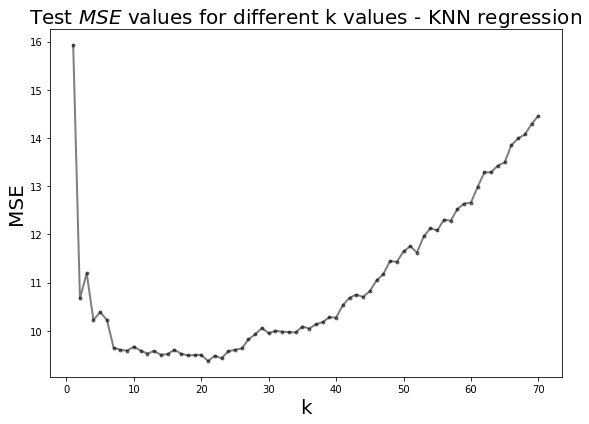

In [22]:
# plot a graph depicting the realtion between the k values and MSE

plt.figure(figsize=(8,6))
plt.plot(knn_dict.keys(), knn_dict.values(),'k.-',alpha=0.5,linewidth=2)

# Set the title and axis labels
plt.xlabel('k',fontsize=20)
plt.ylabel('MSE',fontsize = 20)
plt.title('Test $MSE$ values for different k values - KNN regression',fontsize=20)
plt.tight_layout()


In [23]:
# lowest MSE 
min_mse = min(knn_dict.values())

# use list comprehensions to find the k value associated with the lowest MSE
best_model = [key for (key, value) in knn_dict.items() if value == min_mse]

#print the best k-values
print("The best k value is", best_model, "with a MSE of", min_mse)

The best k value is [21.0] with a MSE of 9.3737052154195
